# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365

In [6]:
app_train['YEARS_BIRTH'].isnull().sum()

0

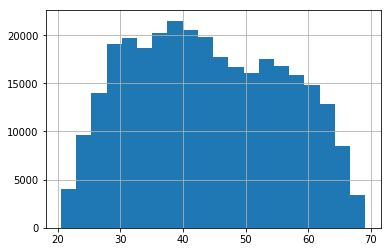

In [7]:
app_train['YEARS_BIRTH'].hist(bins = 20)

{'whiskers': [<matplotlib.lines.Line2D at 0x11820d7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1182160b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x11820d668>],
 'medians': [<matplotlib.lines.Line2D at 0x118216908>],
 'fliers': [<matplotlib.lines.Line2D at 0x118216d30>],
 'means': []}

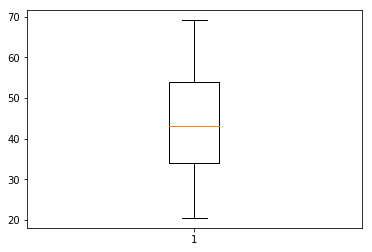

In [8]:
plt.boxplot(app_train['YEARS_BIRTH'])

In [9]:
app_train['YEARS_BIRTH_new'] = pd.cut(app_train['YEARS_BIRTH'],5)

In [10]:
app_train['YEARS_BIRTH_new'].value_counts()

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: YEARS_BIRTH_new, dtype: int64

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

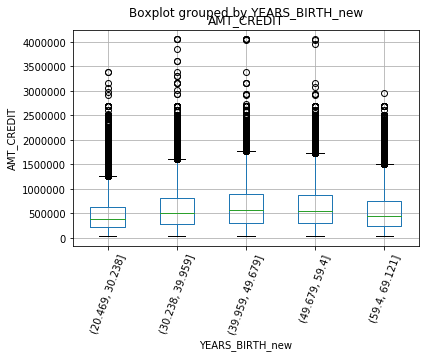

In [11]:
app_train.boxplot(column = ['AMT_CREDIT'], by = 'YEARS_BIRTH_new')
plt.xlabel('YEARS_BIRTH_new')
plt.ylabel('AMT_CREDIT')
plt.xticks(rotation = 70)

In [12]:
app_train['YEARS_BIRTH_new2'] = pd.cut(app_train['YEARS_BIRTH'], 2)
app_train['YEARS_BIRTH_new2'].value_counts()

(20.469, 44.819]    167344
(44.819, 69.121]    140167
Name: YEARS_BIRTH_new2, dtype: int64

(array([1, 2]), <a list of 2 Text xticklabel objects>)

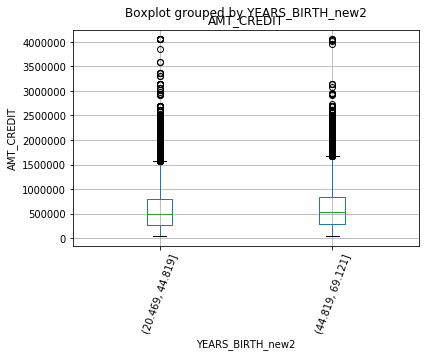

In [13]:
app_train.boxplot(column = "AMT_CREDIT", by = "YEARS_BIRTH_new2")
plt.xlabel("YEARS_BIRTH_new2")
plt.ylabel('AMT_CREDIT')
plt.xticks(rotation =70)

In [14]:
app_train['YEARS_BIRTH_new3'] = pd.cut(app_train['YEARS_BIRTH'], 8)
app_train['YEARS_BIRTH_new3'].value_counts()

(38.744, 44.819]    51100
(32.668, 38.744]    49708
(26.593, 32.668]    47520
(50.895, 56.97]     42345
(44.819, 50.895]    42340
(56.97, 63.045]     37281
(20.469, 26.593]    19016
(63.045, 69.121]    18201
Name: YEARS_BIRTH_new3, dtype: int64

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

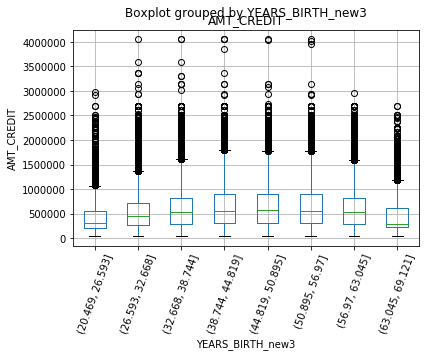

In [15]:
app_train.boxplot(column = "AMT_CREDIT", by = "YEARS_BIRTH_new3")
plt.xlabel("YEARS_BIRTH_new3")
plt.ylabel('AMT_CREDIT')
plt.xticks(rotation =70)